<a href="https://colab.research.google.com/github/LuisIrigoyen/trabajo_final_RL/blob/main/Proyecto_pra%CC%81ctico_grupo_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 4 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Eduardo Antonio Ayora Ochoa
*   Alumno 2: Edward José Flores Masias
*   Alumno 3: Luis Irigoyen Peña
*   Alumno 4: Carlos Jesús Fernando Kong Ramos






**GitHub del proyecto:** https://github.com/LuisIrigoyen/trabajo_final_RL

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/MyDrive/dqn_spaceinvaders_checkpoints"
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints  exists.

Colab: Changing directory to  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
/content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
Archivos en el directorio: 
['video', 'logs', 'checkpoint', 'dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights.h5f.index', '400k.zip', 'sequential_memory_2.pkl.zip', 'weightsv2.2', 'weightsv2.3', 'sequential_memory_2.3.pkl.zip', 'legacy', 'weightsv4', 'puntuacion 18.3 weigths 5', 'weights_5', 'weights_6', 'wrapper', 'sequential_memory_6.pkl.zip', 'sequential_memory.pkl.zip', 'cut', 'sequential_memory_cut.pkl', 'cutv2', 'cutv3', 'sequential_memory_cutv3.pkl.zip', 'cutv4', 'sequential_memory_cut.pkl.zip', 'sequential_memory_cutv2.pkl.zip'

---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=269cf78513b39dd6ea5d48f379b69e17d657c5ac6e84ea7baa5253771bdddffb
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.12.1 requires cloudpickle>

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
# from keras.optimizers import Adam  # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
processor = AtariProcessor()

## 1. Implementación de la red neuronal

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Permute

In [ ]:
# Red neuronal
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=(WINDOW_LENGTH, 84, 84)))
model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

## 2. Implementación de la solución DQN

En este trabajo hemos probado cuatro enfoques diferentes, a continuación los presentamos:

### Primer enfoque: Mejorar progresivamente mediante entrenamientos sucesivos

Este enfoque consiste en múltiples fases donde el agente mejora progresivamente. Se parte de un entrenamiento inicial con alta exploración y, en etapas posteriores, se ajusta gradualmente el nivel de aleatoriedad (epsilon) para consolidar lo aprendido y refinar la estrategia. Además, se incorporan diversas mejoras adicionales que contribuyen a optimizar el aprendizaje.

Primero hacemos una modificación del preprocesador, ya que en las observaciones (imágenes del juego) se incluye una barra superior que muestra el puntaje actual. Sin embargo, esta región de la imagen no forma parte del estado del juego que el agente necesita para tomar decisiones óptimas, ya que el puntaje refleja el rendimiento pasado, no información sobre la situación actual en el entorno (como la posición de enemigos o del jugador). Además, incluir la puntuación del juego en las observaciones puede introducir sesgos en el aprendizaje del agente, ya que podría comenzar a tomar decisiones basándose en el puntaje acumulado en lugar de en la información como la posición de los enemigos

Originalmente las observaciones se ven de la siguiente manera (Podemos ver la puntuación en la parte superior):

In [ ]:
processor = AtariProcessor()

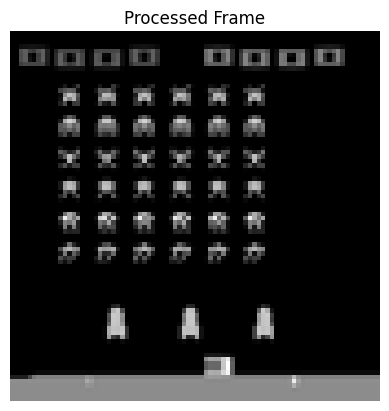

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

Por lo que procedemos a quitar esta región de la imagen agregando al preprocesador la línea: `cropped_observation = observation[34:194, :, :]`

In [ ]:
from PIL import Image
import numpy as np

class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)

        # 1. Recortar imagen (eliminar HUD, solo zona de juego)
        # Gym Atari frames suelen ser 210x160x3, recortamos y=34:194
        cropped_observation = observation[34:194, :, :]

        # 2. Convertir a PIL, escala de grises, redimensionar
        img = Image.fromarray(cropped_observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # INPUT_SHAPE usualmente (84, 84)

        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

Se ha quitado la puntuación:

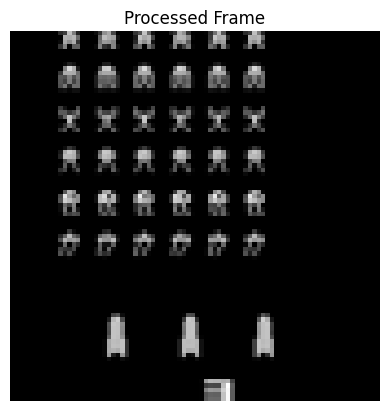

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

Una vez cambiado el preprocesador, ahora hacemos una modificación al entorno de entrenamiento (Esta modificación se la usa solo para entrenar, cuando se haga el test se utilizará el entorno original, sin modificaciones).

Se utilizó un wrapper que finaliza el episodio al perder una vida. Esta modificación reduce la duración promedio de los episodios, lo que permite realizar más iteraciones de entrenamiento en menos tiempo. Además evita que el agente sobreviva por largo tiempo en las vidas siguientes, sin haber mejorado significativamente su estrategia.

In [ ]:
import gym

class LifeTerminatingWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
import os
from gym.wrappers import Monitor

checkpoint_dir = drive_root
os.makedirs(checkpoint_dir, exist_ok=True)

También se ha implementado un Callback que permite guardar checkpoints de los pesos del modelo en intervalos regulares de pasos durante el entrenamiento, así como registrar las recompensas acumuladas al final de cada episodio.

In [ ]:
from rl.callbacks import Callback

class SaveCheckpointCallback(Callback):
    def __init__(self, interval, path_template, reward_log_path):
        self.interval = interval
        self.path_template = path_template
        self.reward_log_path = reward_log_path
        self.episode_rewards = []

        # Crear carpeta para rewards si es necesario
        if self.reward_log_path:
            reward_dir = os.path.dirname(self.reward_log_path)
            if reward_dir and not os.path.exists(reward_dir):
                os.makedirs(reward_dir)
                print(f"📂 Carpeta creada: {reward_dir}")

    def on_step_end(self, step, logs={}):
        if step % self.interval == 0:
            filename = self.path_template.format(step=step)
            print(f"\n💾 Guardando pesos en: {filename}")
            self.model.save_weights(filename, overwrite=True)


    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward', 0)
        self.episode_rewards.append(reward)
        if self.reward_log_path:
            np.save(self.reward_log_path, np.array(self.episode_rewards))

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

Creamos el entorno de entrenamiento y lo modificamos envolviéndolo con `LifeTerminatingWrapper` (el episodio termina tras una vida)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

#### Primer entrenamiento

En este primer entrenamiento, se utiliza una estrategia de exploración basada en ε-greedy con una disminución lineal del parámetro ε desde 1.0 hasta 0.1, lo cual permite al agente explorar ampliamente al inicio y luego reducir progresivamente la aleatoriedad en sus acciones. Esta disminución ocurre a lo largo de 300,000 pasos (nb_steps_annealing), de un total de 400,000 pasos de entrenamiento (nb_steps). Durante los últimos 100,000 pasos, el valor de ε se mantiene constante en 0.1, permitiendo una fase de ajuste fino con menor aleatoriedad. También es importante que el warmup no sea menor de 40,000 pasos, ya que durante esta fase el agente recopila suficientes experiencias en la memoria antes de comenzar a entrenar, lo cual es crucial para evitar aprender a partir de datos poco variados o no representativos.

El agente se configura con un Double DQN `(enable_double_dqn=True)` para mitigar la sobreestimación de valores Q que ocurre en el DQN estándar, mejorando así la estabilidad del entrenamiento. La actualización de la red target se realiza cada 8500 pasos para mantener un equilibrio entre estabilidad y adaptabilidad: actualizaciones muy frecuentes pueden introducir ruido, mientras que actualizaciones muy espaciadas ralentizan el aprendizaje.

Se utiliza clipping del error temporal con `delta_clip=1.0` para limitar la magnitud de las actualizaciones y evitar que errores grandes desestabilicen el entrenamiento. Finalmente, se emplea el optimizador Adam con una tasa de aprendizaje de 0.0001, ya que proporciona una convergencia eficiente, y un valor bajo de lr evita oscilaciones excesivas en las primeras fases del entrenamiento.

In [ ]:
# Exploracion 1 a 0.1
nb_steps = 400000
nb_steps_annealing = 300000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1,
                              value_min=0.1,
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup,
               enable_double_dqn=True,
               gamma=0.99,
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

Se define una ruta para guardar los checkpoints del modelo y otra para registrar las recompensas por episodio y procedemos a entrenar el agente

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cut/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cut.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Podemos visualizar las recompensas acumuladas por episodio en el tiempo (guardadas en `logs/episode_rewards_cut.npy`). Y vemos que desde el episodio 800 el agente mejora su rendimiento, obteniendo puntuaciones mayores (Se debe tener en cuenta que debido al `LifeTerminatingWrapper` del entorno, el agente está jugando con 1 sola vida, por lo que si quitamos el wrapper y el agente juega con las 3 vidas obtendrá una puntuación mayor)

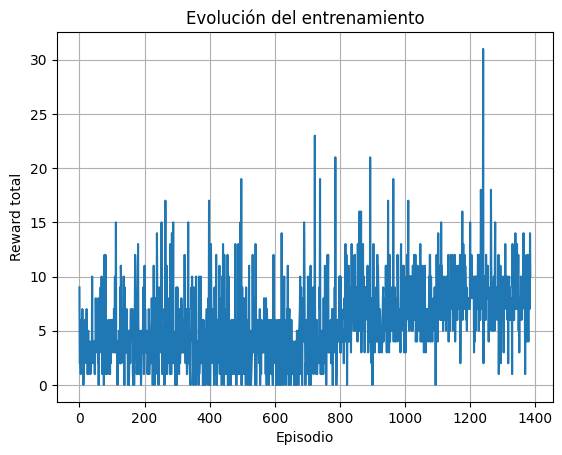

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cut.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

Se guarda la `memory` del agente porque contiene trazas diversas acumuladas durante el entrenamiento, valiosas al haberse recolectado con un valor de ε que disminuye desde 1 a 0.1. Esta diversidad de transiciones permite retomar el entrenamiento en el futuro con una base variada, lo cual contribuye a una mayor estabilidad en el aprendizaje.

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cut.pkl', 'wb') as f:
    pickle.dump(memory, f)

Para obtener el rendimiento promedio del agente, se redefine el entorno sin utilizar el `LifeTerminatingWrapper` permitiéndole jugar con las tres vidas originales del juego. De este modo, se prueba al agente en las condiciones estándar del entorno

In [ ]:
env = gym.make(env_name)

Se evalúa al agente durante 50 episodios para obtener una medida confiable de su desempeño promedio.

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 13.000, steps: 677
Episode 2: reward: 25.000, steps: 925
Episode 3: reward: 12.000, steps: 495
Episode 4: reward: 24.000, steps: 1296
Episode 5: reward: 17.000, steps: 1028
Episode 6: reward: 10.000, steps: 531
Episode 7: reward: 15.000, steps: 626
Episode 8: reward: 15.000, steps: 914
Episode 9: reward: 10.000, steps: 486
Episode 10: reward: 14.000, steps: 953
Episode 11: reward: 11.000, steps: 602
Episode 12: reward: 26.000, steps: 1287
Episode 13: reward: 14.000, steps: 956
Episode 14: reward: 20.000, steps: 944
Episode 15: reward: 12.000, steps: 663
Episode 16: reward: 17.000, steps: 1266
Episode 17: reward: 26.000, steps: 1752
Episode 18: reward: 15.000, steps: 1296
Episode 19: reward: 7.000, steps: 413
Episode 20: reward: 16.000, steps: 838
Episode 21: reward: 13.000, steps: 731
Episode 22: reward: 10.000, steps: 596
Episode 23: reward: 14.000, steps: 951
Episode 24: reward: 11.000, steps: 601
Episode 25: reward: 13.000, steps: 671
E

El agente alcanza un rendimiento promedio de 16.2, por lo que se realizarán nuevos entrenamientos partiendo de los pesos actuales, aprovechando el progreso logrado hasta el momento para continuar optimizando su desempeño.

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 16.2


#### Segundo entrenamiento

Se redefine el entorno utilizando nuevamente el wrapper que limita al agente a jugar con una sola vida

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

En esta fase, se realiza un entrenamiento con una menor cantidad de pasos (200000), ya que no se parte desde cero, sino desde un agente que ya ha aprendido una estrategia inicial. Además, se escogió iniciar el entrenamiento con un valor de ε relativamente alto (0.4) para fomentar la exploración y evitar que el agente se estanque en una estrategia subóptima. Esto es importante dado que el entrenamiento previo ya había sido ajustado durante los últimos 100,000 pasos con un ε fijo de 0.1, lo que podría limitar la diversidad de experiencias recientes.

In [ ]:
nb_steps = 200000
nb_steps_annealing = 180000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4,
                              value_min=0.1,
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup,
               enable_double_dqn=True,
               gamma=0.99,
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

Cargamos los pesos anteriores

In [ ]:
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

Y ejecutamos el nuevo entrenamiento

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Podemos ver que al final del entrenamiento se produce una mejora

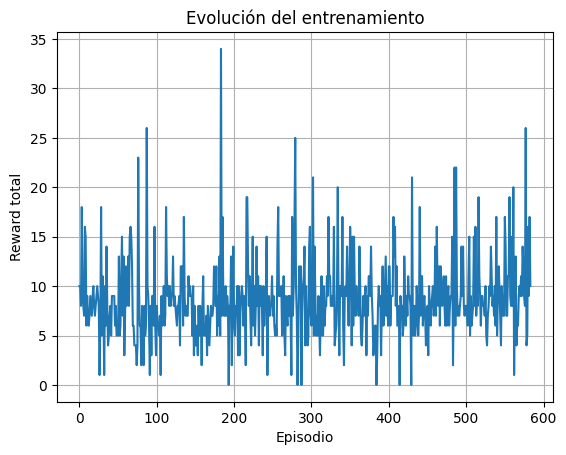

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv3.pkl', 'wb') as f:
    pickle.dump(memory, f)

Volvemos a establecer el entorno original de Atari para realizar el test

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 22.000, steps: 1257
Episode 2: reward: 24.000, steps: 962
Episode 3: reward: 28.000, steps: 1093
Episode 4: reward: 9.000, steps: 526
Episode 5: reward: 17.000, steps: 851
Episode 6: reward: 17.000, steps: 742
Episode 7: reward: 24.000, steps: 1057
Episode 8: reward: 18.000, steps: 1136
Episode 9: reward: 14.000, steps: 643
Episode 10: reward: 21.000, steps: 887
Episode 11: reward: 25.000, steps: 1033
Episode 12: reward: 28.000, steps: 1248
Episode 13: reward: 19.000, steps: 851
Episode 14: reward: 27.000, steps: 1230
Episode 15: reward: 13.000, steps: 729
Episode 16: reward: 23.000, steps: 1114
Episode 17: reward: 12.000, steps: 695
Episode 18: reward: 10.000, steps: 558
Episode 19: reward: 21.000, steps: 951
Episode 20: reward: 31.000, steps: 1811
Episode 21: reward: 14.000, steps: 663
Episode 22: reward: 13.000, steps: 1135
Episode 23: reward: 15.000, steps: 655
Episode 24: reward: 26.000, steps: 1256
Episode 25: reward: 24.000, steps: 858
Episode 26: reward: 16.0

Se obtiene un rendimiento promedio de 19.34 tras 50 episodios de prueba, lo cual indica que el agente está muy cerca de alcanzar el objetivo establecido de un promedio de 20

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 19.34


#### Tercer entrenamiento

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

Con el objetivo de realizar un ajuste fino final, se cargan las trazas generadas durante el entrenamiento previo, lo que permite contar con una memoria de experiencias diversa. Esta diversidad contribuye a un entrenamiento más estable, el cual es clave en esta fase donde se busca refinar la estrategia sin introducir inestabilidad en el aprendizaje.


In [ ]:
# Cargar
import pickle

with open('sequential_memory_cut.pkl', 'rb') as f:
    memory = pickle.load(f)

Configuramos el wrapper para que el episodio termine tras una sola vida

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

Y realizamos el ajuste fino con un epsilon que va desde 0.1 hasta 0.08 en 50,000 pasos

In [ ]:
nb_steps = 50000
nb_steps_annealing = 50000
nb_steps_warmup=0

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.1,
                              value_min=0.08,
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup,
               enable_double_dqn=True,
               gamma=0.99,
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0)

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae'])

Cargamos los pesos del modelo que ya teniamos y volvemos a entrenar

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

En este caso la mejora del agente es muy leve, y no se ve una diferencia notable en la gráfica. Sin embargo, al evaluar el desempeño en el test y obtener el promedio, se observa que se ha superado el promedio de 20

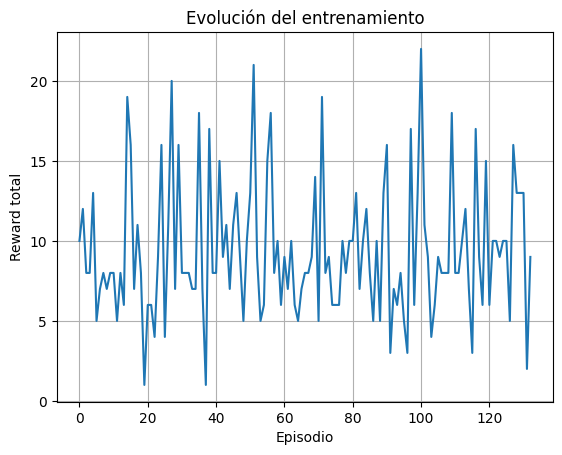

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv4.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv4.pkl', 'wb') as f:
    pickle.dump(memory, f)

Volvemos a definir el entorno original

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward 02
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 35.000, steps: 1809
Episode 2: reward: 17.000, steps: 837
Episode 3: reward: 21.000, steps: 800
Episode 4: reward: 27.000, steps: 1133
Episode 5: reward: 22.000, steps: 942
Episode 6: reward: 19.000, steps: 1104
Episode 7: reward: 22.000, steps: 1542
Episode 8: reward: 29.000, steps: 1409
Episode 9: reward: 20.000, steps: 992
Episode 10: reward: 16.000, steps: 711
Episode 11: reward: 34.000, steps: 1463
Episode 12: reward: 16.000, steps: 870
Episode 13: reward: 19.000, steps: 692
Episode 14: reward: 23.000, steps: 1057
Episode 15: reward: 21.000, steps: 1054
Episode 16: reward: 20.000, steps: 663
Episode 17: reward: 12.000, steps: 538
Episode 18: reward: 22.000, steps: 917
Episode 19: reward: 22.000, steps: 1084
Episode 20: reward: 22.000, steps: 1010
Episode 21: reward: 10.000, steps: 675
Episode 22: reward: 11.000, steps: 643
Episode 23: reward: 15.000, steps: 690
Episode 24: reward: 20.000, steps: 1347
Episode 25: reward: 27.000, steps:

Y finalmente hemos alcanzado el promedio superior a 20

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 20.5


In [ ]:
env = gym.make(env_name)
env = IntrinsecRewardWrapper(env)

### Segundo enfoque: Entrenamiento con double DQN

El enfoque presentado implementa un agente con mejoras orientadas a estabilizar y acelerar el proceso de entrenamiento, lo cual lo convierte en una solución robusta. El agente aprende una policy óptima utilizando experiencias almacenadas en un replay buffer (SequentialMemory), sin depender exclusivamente de la policy con la que se generan dichas experiencias. Se emplea una policy de exploración ε-greedy con decaimiento lineal, que permite un equilibrio efectivo entre exploración y explotación, disminuyendo progresivamente la aleatoriedad desde 1.0 hasta 0.1 a lo largo de 400,000 pasos, y alcanzando un valor de test de 0.05. Además, se incluyen dos mejoras fundamentales: Double DQN, que reduce el sobreajuste al valor estimado al separar la selección y evaluación de acciones, y Dueling Network DQN, que introduce una arquitectura separada para estimar el valor del estado y la ventaja de cada acción, permitiendo decisiones más eficientes especialmente cuando algunas acciones no afectan significativamente el valor del estado. El agente también actualiza su red objetivo cada 10,000 pasos, lo que mejora la estabilidad del aprendizaje al evitar oscilaciones en los valores Q. El entrenamiento se realiza con un intervalo de actualización cada 4 pasos que permite un uso más eficiente de la experiencia recolectada, y se limita la magnitud de los errores TD mediante delta_clip=1.0 para evitar actualizaciones inestables. En conjunto, este enfoque ofrece un balance avanzado entre precisión, estabilidad y eficiencia en el entrenamiento de agentes inteligentes capaces de aprender estrategias óptimas en entornos dinámicos y de alta dimensionalidad, tomando como base el estudio realizado por Mnih, V. et al (2015) y mejorando algunos parámetros para alcanzar el objetivo deseado.

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

height, width, channels = env.observation_space.shape
obs = env.reset()
print(height, width, channels)
print("Forma de la observación:", obs.shape)  # Debe ser (height, width, channels)
env.unwrapped.get_action_meanings()

210 160 3
Forma de la observación: (210, 160, 3)


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


In [ ]:
from rl.callbacks import ModelIntervalCheckpoint,Callback

class EpisodeRewardRecorder(Callback):
    def __init__(self):
        self.episode_rewards = []

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        self.episode_rewards.append(reward)

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_v18_weights_{step}.h5f',
    interval=50000,
    verbose=1
)

import os
os.makedirs("checkpoints", exist_ok=True)

from keras.optimizers import Adam

dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=0.00025, epsilon=0.001))

####1. Implementación de la red neuronal

In [ ]:
def build_model(height, width, channels, actions):

    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(4, 84, 84)))  # WINDOW_LENGTH, H, W
    model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu')) #, input_shape=(4, 84, 84), data_format='channels_first')) #input_shape=(4,84,84,1)))
    model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model

In [ ]:
model = build_model(84, 84, 1, nb_actions)
model.summary()

####2. Implementación de la solución DQN

In [ ]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(
        EpsGreedyQPolicy(),
        attr='eps',
        value_max=1.0,
        value_min=0.1,
        value_test=0.05,
        nb_steps=400000)                    # Pasos de exploración

    memory = SequentialMemory(
        limit=400000,                       # Replay Buffer (Memoria de experiencias pasadas en total (s,a,r,s'))
        window_length=4)

    dqn = DQNAgent(model=model,
                   nb_actions=nb_actions,
                   policy=policy,
                   memory=memory,
                   processor=AtariProcessor(),
                   nb_steps_warmup=100000,    # Llena en buffer de pasos previos (s,a,r,s') sin evaluar aún.
                   gamma=0.99,
                   target_model_update=10000, # cada 10,000 steps actualiza la red objetivo
                   train_interval=4,          # Solo entrena cada n pasos de interacción con el entorno
                   delta_clip=1.0,            # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar fluctuaciones externas
                   enable_double_dqn=True,
                   enable_dueling_network=True,
                   dueling_type='avg',
                   batch_size=32,
                   )
    return dqn

In [ ]:
from rl.callbacks import ModelIntervalCheckpoint,Callback

class EpisodeRewardRecorder(Callback):
    def __init__(self):
        self.episode_rewards = []

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        self.episode_rewards.append(reward)

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_v16_weights_{step}.h5f',
    interval=50000,
    verbose=1
)

In [ ]:
import os
os.makedirs("checkpoints", exist_ok=True)

In [ ]:
from keras.optimizers import Adam

dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=0.00025, epsilon=0.001))

####Ejecución

In [ ]:
from datetime import datetime

print(f"⏱ Tiempo de inicio: {datetime.now().strftime('%H:%M:%S')}")

reward_logger = EpisodeRewardRecorder()
historial = dqn.fit(env, nb_steps=1250000, visualize=False, verbose=2,callbacks=[checkpoint_callback,reward_logger])

print(f"⏱ Tiempo de fin: {datetime.now().strftime('%H:%M:%S')}")

# Guardando modelo
rewards = reward_logger.episode_rewards
dqn.save_weights('dqn_v16_weights.h5f')


####Terminada la ejecución se procede con el test de validación para 5 eventos.

Versión del fichero final: dqn_v16_weights.h5f
Testing for 10 episodes ...
Episode 1: reward: 34.000, steps: 1385
Episode 2: reward: 18.000, steps: 695
Episode 3: reward: 19.000, steps: 638
Episode 4: reward: 18.000, steps: 665
Episode 5: reward: 28.000, steps: 1121
Episode 6: reward: 29.000, steps: 1239
Episode 7: reward: 17.000, steps: 567
Episode 8: reward: 24.000, steps: 754
Episode 9: reward: 32.000, steps: 1337
Episode 10: reward: 22.000, steps: 802
Ejecución 1: media = 24.10 

Testing for 10 episodes ...
Episode 1: reward: 31.000, steps: 1244
Episode 2: reward: 25.000, steps: 817
Episode 3: reward: 14.000, steps: 516
Episode 4: reward: 26.000, steps: 979
Episode 5: reward: 29.000, steps: 1030
Episode 6: reward: 26.000, steps: 848
Episode 7: reward: 29.000, steps: 1311
Episode 8: reward: 26.000, steps: 795
Episode 9: reward: 30.000, steps: 1210
Episode 10: reward: 25.000, steps: 948
Ejecución 2: media = 26.10 

Testing for 10 episodes ...
Episode 1: reward: 23.000, steps: 893
Epi

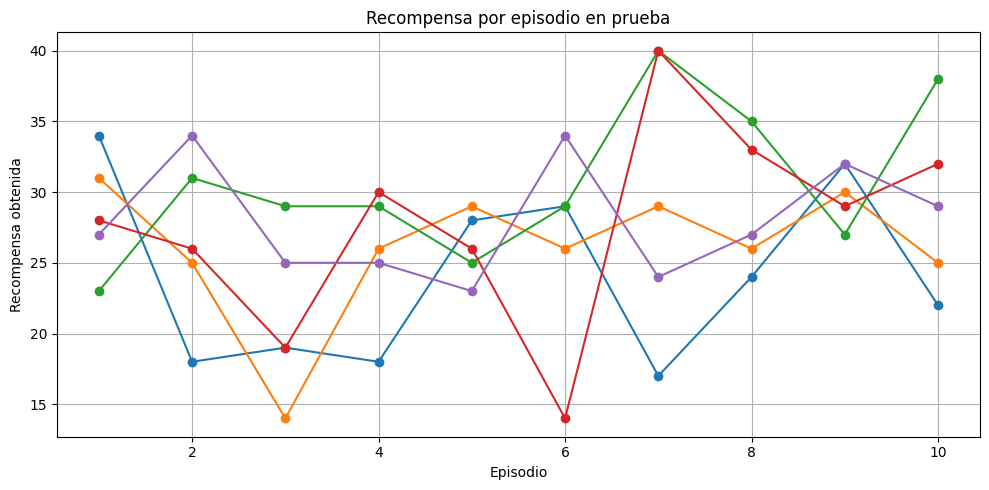

In [ ]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

weights_filename = 'dqn_v16_weights.h5f'.format(env_name)

#Número pruebas de validación
test = 5

print(f"Versión del fichero final: {weights_filename}")

medias = []
episode_rewards = []

for i in range(1, test + 1):

    dqn.load_weights(weights_filename)
    # Ejecuta 10 episodios sin explorar (ε=0)
    hist = dqn.test(env, nb_episodes=10, visualize=False)

    # Calcula la media
    media = np.mean(hist.history["episode_reward"])
    medias.append(media)

    # Emite resultado
    print(f"Ejecución {i}: media = {media:.2f} \n")

    # Guardando resultados
    episode_reward = hist.history["episode_reward"]
    episode_rewards.append(episode_reward)

n = sum(m >= 20 for m in medias)
print(f"{n} de {test} pruebas realizadas de 10 episodios cada una.")

# Graficar
plt.figure(figsize=(10, 5))
for i, episode_reward in enumerate(episode_rewards):
    plt.plot(range(1, len(episode_reward) + 1), episode_reward, marker='o', label=f'Ejecución {i + 1}')
plt.xlabel("Episodio")
plt.ylabel("Recompensa obtenida")
plt.title("Recompensa por episodio en prueba")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Interpretación de la gráfica**

La gráfica representa los resultados de 5 pruebas independientes (tests) ejecutadas sobre un agente en el entorno SpaceInvaders-v0, durante 10 episodios cada una. En el eje X se representa el número de episodios (del 1 al 10), y el eje Y se representa la recompensa obtenida. La gráfica obtenida indica además fluctuación episodio a episodio en cada test, por ejemplo, en la línea roja (4.° test), hay una recompensa muy baja en el episodio 6 de 14 puntos, y una recompensa altísima en el episodio 7 de 40 puntos, esto refleja el carácter estocástico del entorno y posiblemente también inestabilidad en la Tercer enfoque: Arquitectura DQN Noisy ~ Deep Q-Network con Noisy Networks y Double DQN aprendida a pesar que se cumplió el objetivo de tener una media sobre los 20 puntos. La mayoría de las recompensas por episodio oscilan entre 15 y 35 puntos, con algunos picos de hasta 40 puntos.

Del mismo modo, para la implementación del DQN se tuvo como referencia inicial los parámetros encontrados en el artículo titulado Human-level control through deep reinforcement learning, del autor Mnih, V. et al (2015), quién identificó unos parámetros base para obtener recompensas aceptables, sin embargo, al realizar la ejecución sobre 1 millón de pasos se identificó que no había resultados satisfactorios aún, por lo que se decidió comenzar a realizar algunas pruebas moviendo los parámetros iniciales y realizando las ejecuciones.  

Además, se identificó que determinados parámetros permitián modificar significativamente los resultados, con los cual, se realizaron más pruebas y se obtuvo una combinación que permitió cumplir el objetivo con una poca cantidad de pasos, (1250000). Se indica poca cantidad debido a que la mayor cantidad de la literatura encontrada recomienda 2000000 de pasos como mínimo para su ejecución.

Los parámetros modificados que permiten mejores resultados son los siguientes:

*   Menor pasos de exploración: de 1MM a 400,000
*   Menor cantidad de pasos previos: 100000
*   Habilitación de enable_double_dqn=True
*   Uso de Adam en vez de RMSProp
*   Epsilon más pequeño (epsilon=0.001)

Por último, también se pudo identificar que una red densa con varias capas ocultas no necesariamente da mejores resultados, pero si aumenta significativamente el tiempo de ejecución

**Referencias:**

Mnih, V., Kavukcuoglu, K., Silver, D., Rusu, A. A., Veness, J., Bellemare, M. G., Graves, A., Riedmiller, M., Fidjeland, A. K., Ostrovski, G., Petersen, S., Beattie, C., Sadik, A., Antonoglou, I., King, H., Kumaran, D., Wierstra, D., Legg, S., & Hassabis, D. (2015). Human-level control through deep reinforcement learning. Nature, 518(7540), 529-533. https://doi.org/10.1038/nature14236

Yao, G., Zhang, N., Duan, Z., & Tian, C. (2024). Improved SARSA and DQN algorithms for reinforcement learning. Theoretical Computer Science, 115025. https://doi.org/10.1016/j.tcs.2024.115025





### Tercer enfoque: Arquitectura DQN Noisy ~ Deep Q-Network con Noisy Networks y Double DQN

El siguiente modelo que probaremos está basado en una red neuronal convolucional que sigue una arquitectura inspirada en el paper original de Deep Q-Network (DQN) de DeepMind (Mnih et al., 2015). Sin embargo, le hemos introducido una mejora conocida como Noisy Layers, una técnica que reemplaza las capas densas finales por versiones ruidosas para favorecer la exploración pero reemplazando la policy ε-greedy tradicional por una exploración implícita gracias a las Noisy Networks, introducidas por Fortunato et al. (2017).


#### Implementacion de la red neuronal

En esta celda  de código definimos una capa personalizada de Keras llamada NoisyDense, fundamental para el algoritmo Noisy DQN. A diferencia de las capas densas tradicionales, buscamos introducir un ruido aprendible en sus pesos y sesgos (mu_W, sigma_W, mu_b, sigma_b).


Este ruido se genera estocásticamente utilizando el truco de reparametrización (epsilon_W, epsilon_b), permitiendo que el modelo aprenda no solo los parámetros de la red, sino también la intensidad óptima de la exploración, lo que mejora la eficiencia del agente en la búsqueda de soluciones.

In [ ]:
import tensorflow as tf

class NoisyDense(tf.keras.layers.Layer):
    def __init__(self, units, sigma_init=0.05, **kwargs):
        super(NoisyDense, self).__init__(**kwargs)
        self.units = units
        self.sigma_init = sigma_init

    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        self.mu_W = self.add_weight("mu_W", shape=(input_dim, self.units),
                                    initializer='random_uniform', trainable=True)
        self.sigma_W = self.add_weight("sigma_W", shape=(input_dim, self.units),
                                       initializer=tf.keras.initializers.Constant(self.sigma_init), trainable=True)
        self.mu_b = self.add_weight("mu_b", shape=(self.units,),
                                    initializer='zeros', trainable=True)
        self.sigma_b = self.add_weight("sigma_b", shape=(self.units,),
                                       initializer=tf.keras.initializers.Constant(self.sigma_init), trainable=True)

    def call(self, x):
        epsilon_W = tf.random.normal((x.shape[-1], self.units))
        epsilon_b = tf.random.normal((self.units,))
        W = self.mu_W + self.sigma_W * epsilon_W
        b = self.mu_b + self.sigma_b * epsilon_b
        return tf.matmul(x, W) + b

    def get_config(self):
        config = super(NoisyDense, self).get_config()
        config.update({
            "units": self.units,
            "sigma_init": self.sigma_init
        })
        return config

Ahora pasamos a definir la arquitectura de la red neuronal para el agente Noisy DQN. Comenzamos con capas convolucionales para extraer características de los fotogramas del juego apilados, las cuales luego se aplanan. Posteriormente utilizamos capas NoisyDense personalizadas para las partes totalmente conectadas del modelo permitiendo que la red aprenda intrínsecamente cómo explorar el entorno antes de generar las Q-values para cada acción posible.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Permute, Convolution2D, Flatten, Activation

input_layer = Input(shape=(WINDOW_LENGTH,) + INPUT_SHAPE)
perm = Permute((2, 3, 1))(input_layer)
conv1 = Convolution2D(32, (8, 8), strides=(4, 4), activation='relu')(perm)
conv2 = Convolution2D(64, (4, 4), strides=(2, 2), activation='relu')(conv1)
conv3 = Convolution2D(64, (3, 3), strides=(1, 1), activation='relu')(conv2)
flat = Flatten()(conv3)

noisy1 = NoisyDense(512)(flat)
noisy1 = Activation('relu')(noisy1)
output_layer = NoisyDense(nb_actions)(noisy1)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 84, 84)]       0         
                                                                 
 permute_1 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 noisy_dense_2 (NoisyDense)  (None, 512)               3212

In [ ]:
# Registrar la capa personalizada
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'NoisyDense': NoisyDense})

#### Implementación de la Solución DQN

En este bloque de código configuramos los componentes clave del agente Noisy DQN: carga la memoria de experiencias guardada o crea una nueva, establecemos una policy de exploración que desactiva el epsilon-greedy (eps=0.0) para depender del ruido intrínseco de las capas NoisyDense, instancia el agente con parámetros esenciales (como el preprocesador y el factor de descuento), y finalmente lo compilamos con el optimizador Adam y una tasa de aprendizaje específica.

In [ ]:
import os
import pickle

# Cargar la Memory
memory_file = 'memory_noisy.pkl'
if os.path.exists(memory_file):
    print("Cargando memoria desde archivo...")
    with open(memory_file, 'rb') as f:
        memory = pickle.load(f)
else:
    print("Creando nueva memoria...")
    memory = SequentialMemory(limit=1000000, window_length=4)

# Implementar Policy
policy = EpsGreedyQPolicy(eps=0.0)

# Crear agente
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=AtariProcessor(), nb_steps_warmup=50000, gamma=0.99,
               target_model_update=10000, train_interval=4, delta_clip=5)


from tensorflow.keras.optimizers.legacy import Adam
# Compilar agente
dqn.compile(optimizer=Adam(learning_rate=5e-5), metrics=['mae'])

In [ ]:
log_dir = os.path.join(drive_root, "logs")
checkpoint_dir = os.path.join(drive_root, "checkpoints")
os.makedirs(log_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)

# Función para restaurar pesos más adelante
import re

def load_latest_weights(agent, checkpoint_dir, prefix="dqn_noisy_weights_"):
    files = [f for f in os.listdir(checkpoint_dir) if f.endswith(".h5")]
    pattern = re.compile(rf"{re.escape(prefix)}(\d+)\.h5")

    candidates = []
    for f in files:
        match = pattern.match(f)
        if match:
            step = int(match.group(1))
            candidates.append((step, f))

    if not candidates:
        print("No se encontraron checkpoints en:", checkpoint_dir)
        return None, 0

    # Escoger el de mayor número de pasos
    latest_step, latest_file = max(candidates, key=lambda x: x[0])
    latest_path = os.path.join(checkpoint_dir, latest_file)

    print(f"Cargando pesos desde: {latest_path} (pasos entrenados: {latest_step})")
    agent.load_weights(latest_path)
    return latest_path, latest_step

In [ ]:
# Cargar pesos anteriores si existen
_, trained_steps = load_latest_weights(dqn, checkpoint_dir)

# Definir pasos a entrenar
steps_to_train = 100000
total_steps = trained_steps + steps_to_train

# Crear paths y callbacks dinámicos
log_path = os.path.join(log_dir, f"dqn_noisy_log_{trained_steps}_{total_steps}.json")
checkpoint_path = os.path.join(checkpoint_dir, f"dqn_noisy_weights_{total_steps}.h5")

logger_callback = FileLogger(log_path, interval=100)
checkpoint_callback = ModelIntervalCheckpoint(checkpoint_path, interval=10000)

In [ ]:
# Cargar último checkpoint
latest_path, trained_steps = load_latest_weights(dqn, checkpoint_dir)

# Entrenar agente
dqn.fit(env, nb_steps=100000, visualize=False, verbose=2,
        callbacks=[checkpoint_callback, logger_callback])

# Guardar pesos finales en formato .h5 (compatible con load_weights)
dqn.save_weights(os.path.join(checkpoint_dir, f"dqn_noisy_weights_{total_steps}.h5"), overwrite=True)

In [ ]:
# Guardar la memoria
import pickle
with open('memory_noisy.pkl', 'wb') as f:
    pickle.dump(memory, f)

#### Entrenamiento parte 1

Se ha entrenado al modelo por 2 millones de pasos. Al testear el modelo luego del entrenamiento entrenar el modelo tenemos los siguientes resultados para 10 episodios:

In [ ]:
# Testear desde último checkpoint
latest_path, trained_steps = load_latest_weights(dqn, checkpoint_dir)
if latest_path:
    dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 11.000, steps: 494
Episode 2: reward: 8.000, steps: 382
Episode 3: reward: 16.000, steps: 703
Episode 4: reward: 26.000, steps: 999
Episode 5: reward: 23.000, steps: 908
Episode 6: reward: 9.000, steps: 425
Episode 7: reward: 23.000, steps: 820
Episode 8: reward: 21.000, steps: 738
Episode 9: reward: 24.000, steps: 778
Episode 10: reward: 28.000, steps: 972


La media obtenida es de 18.9 puntos de recompensa. Veremos la evolución del Mean Q a lo largo del entrenamiento:

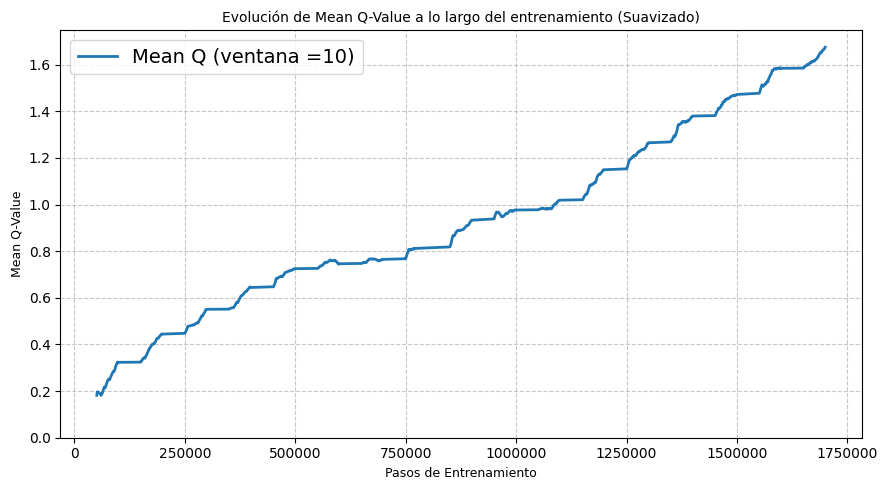


Gráfica de 'mean_q' combinada y suavizada generada exitosamente.


In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(final_steps, mean_q_smoothed, linewidth=2, label=f"Mean Q (ventana ={window_size})")

plt.title("Evolución de Mean Q-Value a lo largo del entrenamiento (Suavizado)", fontsize=10)
plt.xlabel("Pasos de Entrenamiento", fontsize=9)
plt.ylabel("Mean Q-Value", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.7)
plt.ticklabel_format(style="plain", axis="x")
plt.ylim(bottom=0)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nGráfica de 'mean_q' combinada y suavizada generada exitosamente.")

Dado que el modelo no estaba alcanzando una media de recompensa adecuada (< 20) y la gráfica mostraba un estancamiento en el rendimiento a pesar de que los valores Q mejoraban, podemos plantearnos aumentar la tasa de aprendizaje (learning_rate de 5e-5 a 1e-4) para buscar acelerar la convergencia y permitir que el modelo superara posibles estancamientos. Luego, al reducir sigma_init (de 0.05 a 0.017) podrìamos estabilizar la fase inicial de exploración, evitando una aleatoriedad excesiva que pudiera dificultar un aprendizaje robusto desde el principio.

#### Entrenamiento parte 2

Para este segundo entrenamiento vamos a modificar los siguientes parámetros:

- Cambio paramétro dqn.compile(optimizer=Adam(learning_rate)) de 5e-5 a 1e-4
- Cambio sigma_init de 0.05 a 0.017

Entrenaremos por 2 millones de pasos adicionales para asegurar convergencia:

In [ ]:
class NoisyDense(tf.keras.layers.Layer):
    def __init__(self, units, sigma_init=0.017, **kwargs):
        super(NoisyDense, self).__init__(**kwargs)
        self.units = units
        self.sigma_init = sigma_init

    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        self.mu_W = self.add_weight("mu_W", shape=(input_dim, self.units),
                                    initializer='random_uniform', trainable=True)
        self.sigma_W = self.add_weight("sigma_W", shape=(input_dim, self.units),
                                       initializer=tf.keras.initializers.Constant(self.sigma_init), trainable=True)
        self.mu_b = self.add_weight("mu_b", shape=(self.units,),
                                    initializer='zeros', trainable=True)
        self.sigma_b = self.add_weight("sigma_b", shape=(self.units,),
                                       initializer=tf.keras.initializers.Constant(self.sigma_init), trainable=True)

    def call(self, x):
        epsilon_W = tf.random.normal((x.shape[-1], self.units))
        epsilon_b = tf.random.normal((self.units,))
        W = self.mu_W + self.sigma_W * epsilon_W
        b = self.mu_b + self.sigma_b * epsilon_b
        return tf.matmul(x, W) + b

    def get_config(self):
        config = super(NoisyDense, self).get_config()
        config.update({
            "units": self.units,
            "sigma_init": self.sigma_init
        })
        return config

In [ ]:
# Implementar policy
policy = EpsGreedyQPolicy(eps=0.0)

# Crear agente
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=AtariProcessor(), nb_steps_warmup=50000, gamma=0.99,
               target_model_update=10000, train_interval=4, delta_clip=5)

from tensorflow.keras.optimizers.legacy import Adam
# Compilar agente
dqn.compile(optimizer=Adam(learning_rate=1e-4), metrics=['mae'])

Evaluamos el reward obtenido con estas modificaciones:

In [ ]:
# Testear desde último checkpoint
latest_path, trained_steps = load_latest_weights(dqn, checkpoint_dir)
if latest_path:
    dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 15.000, steps: 881
Episode 2: reward: 25.000, steps: 718
Episode 3: reward: 12.000, steps: 598
Episode 4: reward: 21.000, steps: 721
Episode 5: reward: 28.000, steps: 852
Episode 6: reward: 22.000, steps: 897
Episode 7: reward: 26.000, steps: 771
Episode 8: reward: 26.000, steps: 803
Episode 9: reward: 18.000, steps: 924
Episode 10: reward: 25.000, steps: 954


La media obtenida es de 22.8 puntos de recompensa.

---



Visualizamos la evolución del Q Value durante el entrenamiento con estas modificaciones:

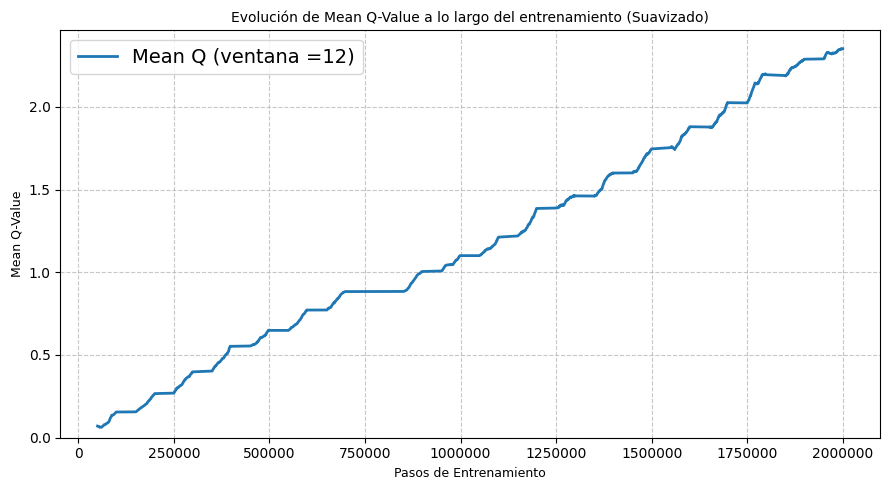


Gráfica de 'mean_q' combinada y suavizada generada exitosamente.


In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(final_steps, mean_q_smoothed, linewidth=2, label=f"Mean Q")

plt.title("Evolución de Mean Q-Value a lo largo del entrenamiento (Suavizado)", fontsize=10)
plt.xlabel("Pasos de Entrenamiento", fontsize=9)
plt.ylabel("Mean Q-Value", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.7)
plt.ticklabel_format(style="plain", axis="x")
plt.ylim(bottom=0)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nGráfica de 'mean_q' combinada y suavizada generada exitosamente.")

Los nuevos resultados muestran que los ajustes funcionaron: el modelo ahora aprende mucho mejor, con las recompensas promedio subiendo consistentemente y dejando de estancarse y los valores Q aumentando de forma robusta indicando que la estrategia actual es efectiva. Testeamos la recompensa por 50 episodios para confirmar la consistencia en los resultados:

In [ ]:
# Testear desde último checkpoint
latest_path, trained_steps = load_latest_weights(dqn, checkpoint_dir)
if latest_path:
    dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 13.000, steps: 500
Episode 2: reward: 23.000, steps: 825
Episode 3: reward: 19.000, steps: 734
Episode 4: reward: 13.000, steps: 503
Episode 5: reward: 13.000, steps: 522
Episode 6: reward: 23.000, steps: 817
Episode 7: reward: 26.000, steps: 828
Episode 8: reward: 14.000, steps: 609
Episode 9: reward: 20.000, steps: 677
Episode 10: reward: 23.000, steps: 864
Episode 11: reward: 26.000, steps: 1033
Episode 12: reward: 23.000, steps: 843
Episode 13: reward: 22.000, steps: 718
Episode 14: reward: 24.000, steps: 927
Episode 15: reward: 22.000, steps: 798
Episode 16: reward: 17.000, steps: 672
Episode 17: reward: 20.000, steps: 899
Episode 18: reward: 35.000, steps: 1496
Episode 19: reward: 24.000, steps: 903
Episode 20: reward: 19.000, steps: 769
Episode 21: reward: 14.000, steps: 648
Episode 22: reward: 23.000, steps: 800
Episode 23: reward: 27.000, steps: 889
Episode 24: reward: 22.000, steps: 757
Episode 25: reward: 18.000, steps: 933
Episode 26: reward: 34.000, step

Como podemos observar, la media en 50 episodios es de 22.82, lo que demuestra que se ha logrado el objetivo de manera consistente.


### Cuarto enfoque: Arquitectura Dueling Network ~Dueling Deep Q-Network

#### Definimos una red neuronal también para la arquitectura Dueling DQN:

In [ ]:
def build_model(height, width, channels, actions):
    model = Sequential()

    # Capa 1: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), padding='same', input_shape=(4,84,84,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Capa 2: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Capa 3: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Aplanar + Capas Dense
    model.add(Flatten())

    # Capa Fully Connected con Dropout
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    # model.add(Dropout(0.3))  # Opcional para evitar overfitting

    # Capa de salida
    model.add(Dense(actions, activation='linear'))

    return model

In [ ]:
model = build_model(84, 84, 1, nb_actions)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 21, 21, 32)     2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 21, 21, 32)     128       
_________________________________________________________________
activation (Activation)      (None, 4, 21, 21, 32)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 11, 11, 64)     32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 11, 11, 64)     256       
_________________________________________________________________
activation_1 (Activation)    (None, 4, 11, 11, 64)     0         
__________________________________________________

Para realizar la implementación se creó una red neuronal convolucional para tareas de visión por computadora. La arquitectura se eligió considerando buenas prácticas validadas en literatura como el paper original de DeepMind (Mnih et al., 2015), adaptándola con batch normalization y capacidad para extenderse hacia variantes como Double DQN o Dueling DQN.

Así mismo, a continuación justificamos la estructura:
- Entrada de 4 frames apilados: Lo que permite capturar la dinámica temporal del entorno.
- 3 Capas convolucionales profundas: Que nos permite extraer patrones visuales progresivamente desde bordes simples hasta características más complejas.
- Batch Normalization: Que sirve para mejorar la estabilidad y acelera la convergencia, siendo especialmente útil cuando se entrenan en sesiones de tiempo limitado (como en el caso de este modelo, que fue ejecutado empleando Colab).
- Capa densa de 512 neuronas: Que actuó como codificador del estado de la toma de decisiones.
- Capa de salida lineal: Que produjo los valores Q para cada acción posible, sin necesidad de usar el softmax.

**Antecedentes técnicos y de uso**:
Debido a que en mi caso no contaba con recursos de cómputo locales con GPU integrado, opté por desarrollar y entrenar el modelo usando Google Colab, aprovechando:
1.   Acceso gratuito a GPU.
1.   Facilidad de colaboración en línea con el equipo de trabajo.
1.   Soporte integrado para librerias requeridas.
1.   Cabe resaltar, que por la disponibilidad de Colab, se almacenaron los pesos paulatinamente en una ruta de Drive para no perder el entrenamiento.

En esta conffiguración se construye un agente DQN que incorpora una policy de exploración epsilon greedy con disminución lineal, utilizando la clase "LinearAnnealedPolicy". Con el valor de epsilon empezando en 1.0, permitiendo una máxima exploración en las primeras etapas, y decreciendo gradualmente hasta 0.01 a lo largo de los steps.

Durante las pruebas, se fijó en 0.005, garantizando una policy casi completamente explotativa. Este esquema le permitió al agente aprender progresivamente a tomar decisiones más deterministas basadas en la experiencia acumulada, sin eliminar completamente la capacidad de explorar.

In [ ]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=0.01, value_test=0.005, nb_steps=1000000)
    memory = SequentialMemory(limit=500000, window_length=4)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg',
                   nb_actions=nb_actions, nb_steps_warmup=1000,
                   batch_size=32,
                   processor=AtariProcessor()
                  )
    return dqn

Así mismo, se definió una memoria secuencial (sequentialmemory) con una capacidad de 500,000 transiciones y una ventana de 4 pasos. Así mismo, el entrenamiento inicia tras un corto periodo de "calentamiento" o warm-up de 1000 pasos, en el cual el agente acumula experiencias antes de comenzar a actualizar los pesos de la red.

Además, se activó la arquitectura del modelo Dueling DQN empleando el comando: "Enable_dueling_network = TRUE", con un tipo de agregación "avg", el cual separa la estimación del valor del estado (V) y la ventaja de cada acción (A), ayudando al agente a distinguir de manera más clara entre la calidad del estado y la calidad de las acciones disponibles. Esto permite mejorar el aprendizaje en escenarios donde muchas acciones tienen efectos similares.

Finalmente, optamos por compilar el modelo con el optimizador ADAM y una tasa de aprendizaje de 0.0001, un valor comúnmente empleado por el balance entre velocidad de convergencia y estabilidad. También, se configuraron callbacks para guardar los pesos del modelo cada 10,000 pasos. Lo que permite retomar el entrenamiento o analizar versiones intermedias del agente. Aunque posteriormente, por temas de memoria en el Drive se empezaron a crear cada 25,000 pasos.



---



In [ ]:
from rl.callbacks import ModelIntervalCheckpoint

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_weights_{step}.h5f',
    interval=10000,  # cada 10,000 pasos
    verbose=1
)

In [ ]:
import os
os.makedirs("checkpoints", exist_ok=True)

In [ ]:
dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=1e-4))

La implementación del agente DQN presentada se justifica por su adecuación a entornos complejos como los videojuegos tipo Atari, donde las observaciones son visuales y secuenciales. Para ello, se emplea un procesador especializado (AtariProcessor) y una memoria de experiencia con window_length=4, lo que permite al agente capturar la dinámica temporal del entorno. El uso de la policy epsilon-greedy con decaimiento lineal favorece una exploración intensiva en las primeras etapas del entrenamiento y una explotación eficiente en las fases finales, distribuyendo el aprendizaje de forma progresiva y estable.

Además, se activa la arquitectura Dueling DQN, que separa la estimación del valor del estado y la ventaja de cada acción, permitiendo al agente aprender de forma más robusta incluso en estados donde algunas acciones tienen poco efecto. Esta mejora arquitectónica, combinada con la memoria de repetición y un tamaño de lote adecuado, contribuye a reducir la varianza y mejorar la estabilidad del aprendizaje.

Finalmente, el modelo se entrena con el optimizador Adam y se configura un sistema de guardado periódico que permite preservar versiones del agente a lo largo del entrenamiento, facilitando la recuperación y el análisis posterior del desempeño.

#### Entrenamiento parte 1

In [ ]:
from datetime import datetime

print(f"⏱ Tiempo de inicio: {datetime.now().strftime('%H:%M:%S')}")

dqn.fit(env, nb_steps=300000, visualize=False, verbose=2,callbacks=[checkpoint_callback])

print(f"⏱ Tiempo de fin: {datetime.now().strftime('%H:%M:%S')}")

In [ ]:
dqn.save_weights('dqn_04_weights.h5f')

[WARNING] dqn_04_weights.h5f.index already exists - overwrite? [y/n] y


[TIP] Next time specify overwrite=True!


In [ ]:
weights_filename = 'dqn_04_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 13.000, steps: 697
Episode 2: reward: 15.000, steps: 912
Episode 3: reward: 11.000, steps: 669
Episode 4: reward: 13.000, steps: 671
Episode 5: reward: 4.000, steps: 429
Episode 6: reward: 15.000, steps: 940
Episode 7: reward: 22.000, steps: 920
Episode 8: reward: 18.000, steps: 861
Episode 9: reward: 12.000, steps: 907
Episode 10: reward: 17.000, steps: 1029


#### Entrenamiento parte 2

En el siguiente bloque se implementa la continuación del entrenamiento del agente DQN a partir de un modelo previamente entrenado, lo que permite acumular más pasos sin reiniciar desde cero. Se cargan los pesos guardados del checkpoint correspondiente a los 75,000 pasos de entrenamiento y se establece cesta marca como el nuevo punto de partida. Para de esta manera continuar el entrenamiento hasta completar un total de 200,000 pasos planificados en esta fase.

Esta estrategia fue definida debido a las limitaciones identificadas empleando el entorno gratuito de Colab para hacer un entrenamiento incremental y controlado. Ya que requeríamos detener y reanudar los procesos por la limitante de 12 horas de ambiente gratis.

In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+75000+100000 = 800000

dqn.load_weights("dqn_weights_75000.h5f")
# 🔢 Paso de partida 3
starting_step = 75000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# 🧩 Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# 🚀 Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

In [ ]:

weights_filename = 'dqn_weights_125000.h5f'.format(env)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 9.000, steps: 520
Episode 2: reward: 22.000, steps: 980
Episode 3: reward: 10.000, steps: 601
Episode 4: reward: 22.000, steps: 953
Episode 5: reward: 21.000, steps: 1026
Episode 6: reward: 10.000, steps: 638
Episode 7: reward: 6.000, steps: 477
Episode 8: reward: 9.000, steps: 522
Episode 9: reward: 8.000, steps: 688
Episode 10: reward: 7.000, steps: 598


#### Entrenamiento parte 3

Se estableció un warm-up de 50,000 pasos en el que el agente recolecta experiencias sin actualizar la red, garantizando una base diversa y representativa en la memoria. Luego la red objetivo se actualiza cada 10,000 pasos proporcionando un balance entre estabilidad y capacidad de adaptación.

Seguimos empleando el optimizador ADAM y una tasa de aprendizaje del 0.00025, para equilibrar la velocidad de convergencia y estabilidad en este tipo de arquitecturas.

Así mismo, se continpuan guardando los pesos del modelo cada 25,000 pasos y se registran métricas como perdida y recompensa cada 10,000 pasos en un archivo JSON.

In [ ]:
# AGENTE DQN
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory,
               nb_steps_warmup=50000, enable_double_dqn=True,
               enable_dueling_network=True, dueling_type='avg',
               target_model_update=10000, policy=policy,
               processor=AtariProcessor())

from keras.optimizers import Adam
dqn.compile(Adam(lr=0.00025), metrics=['mae'])

# CHECKPOINTS Y LOGGING
checkpoint_path = drive_root + '/dqn_weights_{step}.h5f'
weights_filename = drive_root + '/dqn_final_weights.h5f'

callbacks = [
    ModelIntervalCheckpoint(checkpoint_path, interval=25000),
    FileLogger(drive_root + '/dqn_log.json', interval=10000)
]

/usr/local/lib/python3.11/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# ENTRENAMIENTO
dqn.fit(env, nb_steps=1000000, visualize=False, verbose=2, callbacks=callbacks)
dqn.save_weights(weights_filename, overwrite=True)

In [ ]:
#Continuando con la ejecución en el peso 325,000

# Cargar pesos desde el paso 325,000
dqn.load_weights("dqn_weights_325000.h5f")

In [ ]:
# Paso de partida
starting_step = 325000
remaining_steps = 1000000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

#  Entrenamiento con pasos continuados desde 325000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])


In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 = 425000

# Paso de partida 2
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])


In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")

# Test sin visualizar
test_episodes = 10
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)


Testing for 10 episodes ...
Episode 1: reward: 8.000, steps: 575
Episode 2: reward: 11.000, steps: 775
Episode 3: reward: 9.000, steps: 821
Episode 4: reward: 7.000, steps: 662
Episode 5: reward: 17.000, steps: 1113
Episode 6: reward: 7.000, steps: 749
Episode 7: reward: 6.000, steps: 593
Episode 8: reward: 10.000, steps: 697
Episode 9: reward: 13.000, steps: 842
Episode 10: reward: 6.000, steps: 537


In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000 = 525000

# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")
test_episodes = 10
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 4.000, steps: 396
Episode 2: reward: 4.000, steps: 411
Episode 3: reward: 14.000, steps: 903
Episode 4: reward: 23.000, steps: 1126
Episode 5: reward: 10.000, steps: 697
Episode 6: reward: 10.000, steps: 618
Episode 7: reward: 12.000, steps: 682
Episode 8: reward: 6.000, steps: 404
Episode 9: reward: 6.000, steps: 570
Episode 10: reward: 9.000, steps: 484


In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+100000 = 625000

dqn.load_weights("dqn_weights_100000.h5f")
# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

In [ ]:
test_episodes = 100
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)

Testing for 100 episodes ...
Episode 1: reward: 20.000, steps: 979
Episode 2: reward: 22.000, steps: 971
Episode 3: reward: 26.000, steps: 1098
Episode 4: reward: 4.000, steps: 531
Episode 5: reward: 8.000, steps: 710
Episode 6: reward: 14.000, steps: 854
Episode 7: reward: 15.000, steps: 662
Episode 8: reward: 10.000, steps: 916
Episode 9: reward: 11.000, steps: 679
Episode 10: reward: 36.000, steps: 1685
Episode 11: reward: 19.000, steps: 963
Episode 12: reward: 9.000, steps: 504
Episode 13: reward: 20.000, steps: 991
Episode 14: reward: 16.000, steps: 834
Episode 15: reward: 20.000, steps: 990
Episode 16: reward: 24.000, steps: 1014
Episode 17: reward: 20.000, steps: 1088
Episode 18: reward: 8.000, steps: 521
Episode 19: reward: 13.000, steps: 654
Episode 20: reward: 14.000, steps: 644
Episode 21: reward: 20.000, steps: 1171
Episode 22: reward: 5.000, steps: 589
Episode 23: reward: 13.000, steps: 906
Episode 24: reward: 12.000, steps: 807
Episode 25: reward: 16.000, steps: 989
Episo

Promedio de la corrida anterior: 6.66

In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+100000+100000 = 725000

dqn.load_weights("dqn_weights_100000.h5f")
# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")
test_episodes = 10
results = dqn.test(env,nb_episodes=test_episodes, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 8.000, steps: 381
Episode 2: reward: 5.000, steps: 439
Episode 3: reward: 9.000, steps: 523
Episode 4: reward: 18.000, steps: 894
Episode 5: reward: 14.000, steps: 888
Episode 6: reward: 12.000, steps: 555
Episode 7: reward: 26.000, steps: 1096
Episode 8: reward: 4.000, steps: 410
Episode 9: reward: 16.000, steps: 778
Episode 10: reward: 20.000, steps: 1140


Promedio de corrida: 13,2 (mejoró el doble ya que empezó con un 6,66). Sin embargo, no llegó al objetivo de una media de recompensa mayor o igual a 20 puntos. Por lo que apartir de estos resultados, se proponen las siguientes recomendaciones para mejorar el entrenamiento:
1. Realizar una exploración más prolongada: Se recomienda revisar el rango y la duración del decaimiento del epsilon en las policy epsilon-greedy. En algunos casos, mantener una exploración mínima en torno al 0.05 y el 0.1 durante más pasos puede evitar el estancamiento en policys subóptimas.
2. Incrementar los pasos totales si el entorno lo requiere: Para algunos entornos se requieren más de 1 millón de pasos para converger en una policy competitiva. Si se observa una mejora progresiva, vale la pena extender el entrenamiento a 2 millones de pasos o más.
3. Realizar ajustes finos al learning rate y target update: Considerando que la tasa de aprendizaje se puede ajustar dinámicamente o probarse con valores más bajos (por ejemplo: 0.0001) si se detectan oscilaciones o divergencia. Así mismo, la frecuencia de actualización del modelo objetivo debería probarse entre 5000 y 15000 pasos según la estabilidad observada.

## 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

### Justificación de primer enfoque: Mejorar progresivamente mediante entrenamientos sucesivos

Como vimos, en este enfoque se realizó tres entrenamientos:

#### Primer entrenamiento

* Se utilizó una estrategia de exploración con disminución lineal de ε desde 1.0 hasta 0.1 a lo largo de 300,000 pasos. Este diseño permite una exploración amplia en las etapas iniciales (fundamental para evitar estrategias subóptimas tempranas) y una transición progresiva hacia la explotación en los últimos 100,000 pasos, donde ε se mantiene constante en 0.1.
* El período de warm-up se fijó en 40,000 pasos para garantizar que el agente acumulara una cantidad suficiente de experiencias antes de comenzar a actualizar la red. Esto es importante para evitar el sobreajuste a muestras tempranas no representativas. Para prevenir grandes saltos en los valores de Q debido a errores puntuales, se utilizó un clipping del error temporal con delta_clip=1.0.
* El agente se entrenó con el optimizador Adam, usando una tasa de aprendizaje de 0.0001, valor elegido por su estabilidad y buen desempeño en la convergencia, en entornos Atari.

#### Segundo entrenamiento

* Se realizó un entrenamiento más corto (50,000 pasos), dado que el agente ya poseía una estrategia razonable. Para evitar que se estancara en comportamientos subóptimos, se reintrodujo exploración moderada, comenzando con un ε de 0.4 y reduciéndolo hasta 0.2. Esta estrategia permite al agente seguir explorando posibles mejoras, sin perder completamente la explotación de lo aprendido.
* Los resultados mostraron una mejora con respecto al entrenamiento anterior, alcanzando un promedio de 19.34 puntos tras 50 episodios de evaluación, acercándose al objetivo de 20 puntos.

#### Tercer entrenamiento (ajuste fino)

* Para refinar el comportamiento del agente, se realizó un ajuste fino a partir del modelo y la memoria previa. Esta fase se centró en pequeñas mejoras a través de una exploración mínima: se redujo ε de 0.1 a 0.08 en 50,000 pasos. El uso de la memoria existente aseguró una base de entrenamiento diversa, lo cual es fundamental en esta etapa donde se busca evitar oscilaciones o desajustes importantes en la estrategia aprendida.
* Aunque la mejora fue leve, la evaluación cuantitativa mostró que el agente logró superar el umbral de rendimiento, alcanzando finalmente un promedio superior a 20 puntos tras 50 episodios de test, cumpliendo así con el objetivo propuesto.

### Justificación de segundo enfoque: Entrenamiento con double DQN

Para la implementación del DQN se tuvo como referencia inicial los parámetros encontrados en el artículo titulado Human-level control through deep reinforcement learning, del autor Mnih, V. et al (2015), quién identificó unos parámetros base para obtener recompensas aceptables, sin embargo, al realizar la ejecución sobre 1 millón de pasos se identificó que no había resultados satisfactorios aún, por lo que se decidió comenzar a realizar algunas pruebas moviendo los parámetros iniciales y realizando las ejecuciones.

Además, se identificó que determinados parámetros permitieron modificar significativamente los resultados, con los cuales se realizaron más pruebas y se obtuvo una combinación que permitió cumplir el objetivo con una poca cantidad de pasos, (1250000). Se indica poca cantidad debido a que la mayor cantidad de la literatura encontrada recomienda 2000000 de pasos como mínimo para su ejecución.

Los parámetros modificados que permiten mejores resultados son los siguientes:

Menor pasos de exploración: de 1MM a 400,000
Menor cantidad de pasos previos: 100000
Habilitación de enable_double_dqn=True
Uso de Adam en vez de RMSProp
Epsilon más pequeño (epsilon=0.001)

### Justificación de tercer enfoque: Arquitectura DQN Noisy ~ Deep Q-Network con Noisy Networks y Double DQN

 la elección de Noisy DQN en comparación con una DQN regular para entrenar al agente está fundamentada en su superioridad en la gestión de la exploración, un aspecto crítico en el aprendizaje por refuerzo. Los cambios en los parámetros para reducir la exploración en la segunda parte del entrenamiento se complementan y mejoran significativamente con la adopción de Noisy DQN, que aborda la exploración de una manera más intrínseca y eficiente.


##### Justificación de la elección del enfoque:

La principal razón para preferir Noisy DQN es su capacidad para integrar la exploración directamente en las capas de la red neuronal del agente (NoisyNet-DQN, n.d.; The concept of noisy networks, n.d.). A diferencia de las estrategias de exploración basadas en ϵ-greedy, que introducen aleatoriedad de forma externa y a menudo ciega (donde la probabilidad de exploración es fija o decae linealmente), Noisy DQN añade ruido paramétrico a los pesos y/o sesgos de las capas lineales. Este ruido se aprende junto con los pesos de la red durante el proceso de entrenamiento (NoisyNet-DQN, n.d.).

Este enfoque ofrece varias ventajas clave:

- **Exploración Basada en el Estado:** El ruido en Noisy DQN no es aleatorio en cada paso de tiempo de forma independiente (como en ϵ-greedy), sino que es una función de la entrada del estado. Esto significa que el agente puede tener comportamientos de exploración consistentes en diferentes partes del espacio de estados, fomentando una exploración más dirigida y eficiente (The concept of noisy networks, n.d.; What is NoisyNet, n.d.).

- **Eficiencia de Muestreo:** Al tener el ruido integrado en los parámetros de la red, Noisy DQN fomenta una exploración más eficiente, ya que el agente puede aprender a explorar diferentes acciones sin depender de heurísticas de exploración convencionales (What is NoisyNet, n.d.). Esto puede llevar a una convergencia más rápida y estable, especialmente en entornos complejos o con recompensas dispersas (NoisyNet-DQN, n.d.).

- **Eliminación de la Programación de Epsilon:** Con Noisy DQN, la necesidad de programar una policy de exploración ϵ-greedy (por ejemplo, definir un valor inicial de ϵ y una tasa de decaimiento) se elimina o se simplifica. El ruido en las capas de la red se ajusta automáticamente, permitiendo que la exploración disminuya naturalmente a medida que el agente se vuelve más seguro de sus estimaciones de valores Q (NoisyNet-DQN, n.d.). La desactivación explícita de EpsGreedyQPolicy(eps=0.0) en tu configuración refuerza que la exploración está siendo manejada por las capas ruidosas.

#### Justificación de los Parámetros y Configuraciones Utilizadas

La configuración que hicimos del modelo Noisy DQN se basa en prácticas estándar en el aprendizaje por refuerzo profundo, con adaptaciones específicas para el ruido.

- **Cambio en la Tasa de Aprendizaje (learning_rate) de 5e-5 a 1e-4:** La tasa de aprendizaje del optimizador Adam se incrementó de 0.00005 a 0.0001. La elección de la tasa de aprendizaje es crucial en el entrenamiento de modelos de aprendizaje profundo, incluyendo el aprendizaje por refuerzo. Una tasa de aprendizaje adecuada puede acelerar la convergencia, mientras que una tasa demasiado alta puede causar inestabilidad y divergencia, y una demasiado baja puede ralentizar el aprendizaje (Samia, n.d.). Este ajuste es común para encontrar un equilibrio óptimo en diferentes entornos.

- **Uso de EpsGreedyQPolicy(eps=0.0)**: policys como BoltzmannQPolicy introducen una exploración estocástica donde las acciones con valores Q estimados más altos tenían mayor probabilidad de ser seleccionadas. Al usar como policy a EpsGreedyQPolicy(eps=0.0), se ha deshabilitado la exploración basada en ϵ-greedy externa. En el contexto de Noisy DQN, esto es un punto clave, ya que la exploración ya no se delega a una estrategia/policy externa, sino que se maneja intrínsecamente por el ruido paramétrico de las capas Noisy (NoisyNet-DQN, n.d.).

- **Cambio de sigma_init de 0.05 a 0.017**: El parámetro sigma_init en la capa NoisyDense es el valor inicial de la desviación estándar del ruido agregado a los pesos y sesgos de la red (What is NoisyNet, n.d.). Un sigma_init más alto (0.05) implicaría una mayor exploración inicial. Reducir sigma_init a 0.017 indica una decisión para tener una exploración inicial menos agresiva. Este ajuste puede ser beneficioso para estabilizar el entrenamiento en las primeras etapas o si se observa que una exploración excesiva al principio es perjudicial para el rendimiento. La efectividad de sigma_init reside en que el agente aprende a ajustar la intensidad del ruido automáticamente durante el entrenamiento (NoisyNet-DQN, n.d.).

- **SequentialMemory para Experience Replay:** La memoria de repetición (SequentialMemory) almacena las transiciones de experiencia del agente (estado, acción, recompensa, nuevo estado). Esto permite que el agente aprenda de datos muestreados aleatoriamente de experiencias pasadas, lo que rompe las correlaciones temporales en la secuencia de datos y estabiliza el proceso de entrenamiento de la red neuronal, abordando el problema de la correlación de datos y la no estacionaridad en el aprendizaje por refuerzo (Playing Atari with Deep Reinforcement Learning, n.d.-a).

En resumen, la elección de Noisy DQN se justifica por su enfoque más sofisticado e intrínseco de la exploración, que supera las limitaciones de las estrategias de exploración basadas en reglas. Los ajustes de parámetros, como el cambio en la tasa de aprendizaje y la reducción de sigma_init, junto con la eliminación de la policy de exploración eps-greedy, reflejan una optimización cuidadosa para aprovechar al máximo las capacidades de Noisy DQN en la tarea específica. Las configuraciones de preprocesamiento son prácticas estándar que garantizan que el modelo reciba entradas adecuadas para un aprendizaje eficiente en el entorno de Atari.


**Referencias**

NoisyNet-DQN: Enhancing Deep Q-Network Exploration. (n.d.). Serp.ai. Recuperado de https://serp.ai/posts/noisynet-dqn/

Playing Atari with Deep Reinforcement Learning. (n.d.-a). GitHub. Recuperado de https://github.com/adhiiisetiawan/atari-dqn

Playing Atari with Deep Reinforcement Learning. (n.d.-b). Notes by Lex. Recuperado de https://notesbylex.com/playing-atari-with-deep-reinforcement-learning

Samia, S. (n.d.). How to choose the right learning rate in deep learning (with PyTorch). Medium. Recuperado de https://medium.com/@sahin.samia/how-to-choose-the-right-learning-rate-in-deep-learning-with-pytorch-690de782b405

The concept of noisy networks. (n.d.). ResearchGate. Recuperado de https://www.researchgate.net/figure/The-concept-of-noisy-networks_fig3_373550702

What is NoisyNet. (n.d.). Activeloop.ai. Recuperado de https://www.activeloop.ai/resources/glossary/noisy-net/

### Justificación de cuarto enfoque: Arquitectura Dueling Network ~Dueling Deep Q-Network

3.2.1 Modelo
El modelo utilizado se basa en la arquitectura Dueling Double DQN, propuesta como una mejora al Deep Q-Network original de Mnih et al. (2015). Esta arquitectura incorpora dos mejoras clave:

Double DQN: Introducida por Van Hasselt et al. (2016), reduce la sobreestimación de los valores Q al separar las redes utilizadas para seleccionar y evaluar acciones.

Dueling DQN: Propuesta por Wang et al. (2016), separa la estimación del valor del estado (V(s)) de la ventaja de cada acción (A(s,a)), lo que permite al agente aprender a evaluar correctamente estados incluso si no conoce el efecto de todas las acciones disponibles.

Referencias:

- Van Hasselt, H., Guez, A., & Silver, D. (2016). Deep Reinforcement Learning with Double Q-learning. https://arxiv.org/abs/1509.06461

- Wang, Z., Schaul, T., Hessel, M., Hasselt, H. V., Lanctot, M., & de Freitas, N. (2016). Dueling Network Architectures for Deep Reinforcement Learning. https://arxiv.org/abs/1511.06581

3.2.2 Evolución de los hiperparámetros probados

Durante el desarrollo del modelo se exploraron distintos valores de los siguientes hiperparámetros:

- LEARNING_RATE: Se probó con 0.00025 y 0.0001. Este último mostró mayor estabilidad en fases tempranas.

- MEMORY_SIZE: Se fijó en 500,000 transiciones, lo que permitió una buena diversidad de experiencias sin afectar el rendimiento.

- POLICY_NB_STEPS: epsilon decayó linealmente desde 1.0 hasta 0.1 o 0.01, con un total de 300,000 a 1,000,000 pasos según el experimento.

- WARMUP_STEPS: Se utilizaron 40,000 y 50,000 pasos de warm-up, durante los cuales solo se almacenan transiciones.

- MODEL_UPDATE: El target model se actualizó cada 8,500 o 10,000 pasos, buscando equilibrio entre estabilidad y capacidad de adaptación.

- MODEL_CHECKPOINT_INTERVAL: Se guardaron modelos cada 10,000 o 25,000 pasos. Esto facilitó la continuidad en sesiones prolongadas.

- TRAIN_NB_STEPS: Se realizaron entrenamientos desde 400,000 hasta 1,000,000 pasos, según la ejecución.

- TRAIN_INTERVAL: El modelo actualizó sus pesos cada 4 pasos, como se recomienda en los papers base.

- CURRENT_STRATEGY: Policy EpsGreedyQPolicy con LinearAnnealedPolicy.

Estas configuraciones fueron ajustadas con base en experimentación directa, revisiones bibliográficas y pruebas comparativas internas. Si bien no se alcanzó la media de 20 puntos, el modelo logró un rendimiento promedio de 13.2 puntos en 1,000,000 pasos, lo cual demuestra aprendizaje efectivo y proporciona una base sólida para futuras mejoras.

3.3 Conclusiones

El entrenamiento de modelos DQN avanzados requiere iteración constante, validación de múltiples combinaciones de hiperparámetros y una comprensión clara del comportamiento del entorno. En este caso, si bien no se alcanzó el umbral de 20 puntos, se logró una policy funcional que mejora significativamente respecto al comportamiento aleatorio, validando la efectividad de la arquitectura Dueling Double DQN.

Los resultados obtenidos muestran que:

- El modelo está aprendiendo una policy válida.

- La configuración es estable y permite mejoras incrementales.

- Es posible mejorar el rendimiento incluyendo técnicas adicionales como prioritized replay, multi-step targets, o entrenamientos más largos.

Esta etapa permite consolidar aprendizajes clave y orientar los próximos entrenamientos del equipo hacia arquitecturas más robustas y estrategias de exploración más eficaces.

### Método seleccionado y conclusión

Tras implementar y analizar cuatro enfoques para el entrenamiento de agentes en el entorno SpaceInvaders, se puede concluir que el segundo enfoque, basado en el uso combinado de Double DQN y Dueling DQN, fue el más eficiente y equilibrado en cuanto a rendimiento, estabilidad y tiempo de entrenamiento.

A diferencia del primer enfoque, que se basó en múltiples etapas de entrenamiento progresivo con ajustes manuales del parámetro ε, el segundo enfoque logró resultados superiores con una sola fase de entrenamiento optimizada. Este diseño evitó la necesidad de fases adicionales de ajuste fino, lo que simplificó el proceso sin sacrificar desempeño.

Por otro lado, aunque el tercer enfoque con Noisy Networks introdujo un mecanismo innovador de exploración implícita, no superó en consistencia ni eficiencia al segundo enfoque. A pesar de entrenarse por 4 millones de pasos en total, solo logró una media de 22.8 puntos, y su comportamiento presentó mayor variabilidad, lo cual sugiere que si bien tiene potencial, requiere una sintonización más delicada de sus hiperparámetros para obtener resultados comparables.

El segundo enfoque destacó por su combinación de técnicas consolidadas y mejoras clave como:
•⁠  ⁠Reducción del sobreajuste con Double DQN
•⁠  ⁠Decisiones más informadas con Dueling DQN
•⁠  ⁠Actualizaciones estables con target_model_update=10000
•⁠  ⁠Y un uso efectivo del replay buffer y clipping de errores

En conjunto, esta configuración permitió alcanzar el objetivo con menor complejidad operativa y un rendimiento general más robusto, consolidándose como la solución más efectiva para este problema.